In [44]:
#Importacion ded librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [45]:
df = pd.read_excel("C:\\Usuario\\nombre\\carpeta\\REGRESION-LINEAL\\data.xlsx")

In [46]:
#Importacion de los datos
dataset = pd.read_excel("data.xlsx")

In [47]:
#Vemos el dataset
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [48]:
#shape
#Este fragmento de código devuelve la forma del DataFrame dataset, que es una tupla que representa el número de filas y columnas 
dataset.shape

(25, 2)

In [49]:
#describe
#Analisis estadistico basico, que genera un resumen estadístico básico del conjunto de datos.
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


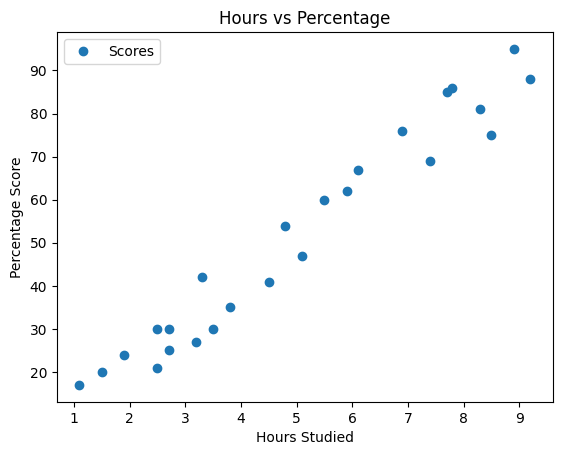

In [50]:
#Ploteamos el dataset
dataset.plot(x='Hours', y='Scores', style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
#plt.axvline(x=5,color='r')
plt.show()

In [51]:
#1) Preparacion de datos
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [52]:
#2) Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [53]:
# 3) Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #instanciar el objeto
regressor.fit(X_train, y_train) # ajustamos el modelo segun el metodo fit del objeto regressor

LinearRegression()

In [54]:
#Recuperamos la intersección
print(regressor.intercept_)

2.6912867616078273


In [55]:
#La pendiente
print(regressor.coef_)

[9.78385439]


In [56]:
X_test

array([[8.3],
       [2.5],
       [2.5]])

In [57]:
y_test

array([81, 30, 21], dtype=int64)

In [58]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([83.89727817, 27.15092273, 27.15092273])

El y_pred es una matriz numpy que contiene todos los valores predichos para los valores de entrada en la X_test


In [59]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
0,81,83.897278,-2.897278,-3.576887
1,30,27.150923,2.849077,9.496924
2,21,27.150923,-6.150923,-29.290108


## 📊 Análisis de horas estudiadas vs porcentaje de puntuación

### Datos reales 🔵 
Datos Reales: Los puntos azules representan los datos reales, es decir, las horas que los estudiantes estudiaron y el porcentaje de puntuación que obtuvieron.

### Línea de Regresión🔴
Línea de Regresión: La línea roja es una línea de regresión que muestra la tendencia general de los datos. Esta línea ayuda a visualizar cómo, en promedio, el porcentaje de puntuación aumenta a medida que aumentan las horas estudiadas.

### Conclusión📈
Conclusión: La gráfica sugiere que existe una correlación positiva entre las horas estudiadas y el porcentaje de puntuación. En otras palabras, generalmente, a más horas de estudio, mayor es el porcentaje de puntuación obtenido.

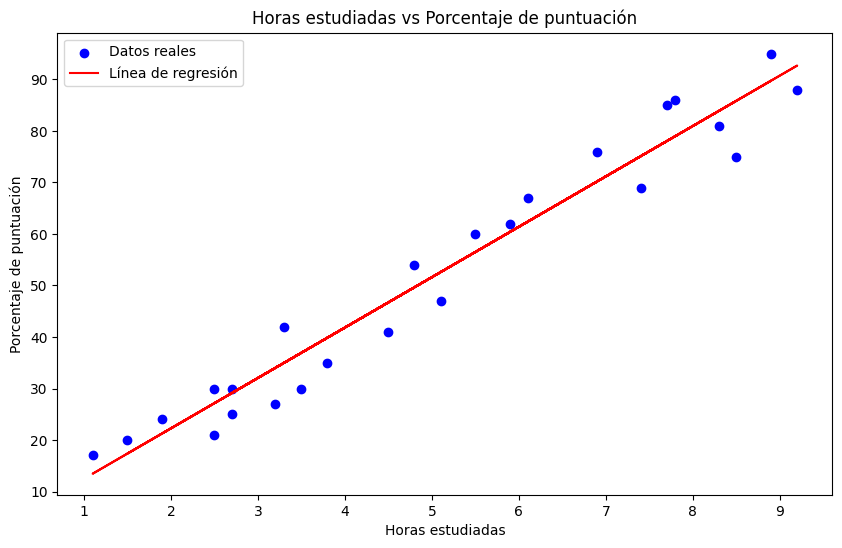

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, regressor.predict(X), color='red', label='Línea de regresión')
plt.title('Horas estudiadas vs Porcentaje de puntuación')
plt.xlabel('Horas estudiadas')
plt.ylabel('Porcentaje de puntuación')
plt.legend()
plt.show()

## 📊 Análisis de residuos

### Datos representados 🔵
Puntos de Dispersión: Cada punto azul representa un residuo, que es la diferencia entre el valor real y el valor predicho por el modelo.

### Línea de referencia 🔴
Línea Horizontal: La línea roja punteada en y=0 sirve como referencia para evaluar la distribución de los residuos.

### Conclusión 📈
Conclusión: La distribución de los puntos alrededor de la línea y=0 indica qué tan bien se ajusta el modelo. Si los puntos se distribuyen aleatoriamente alrededor de esta línea, sugiere que el modelo se ajusta bien. 
Los patrones o agrupaciones podrían indicar problemas en el modelo.


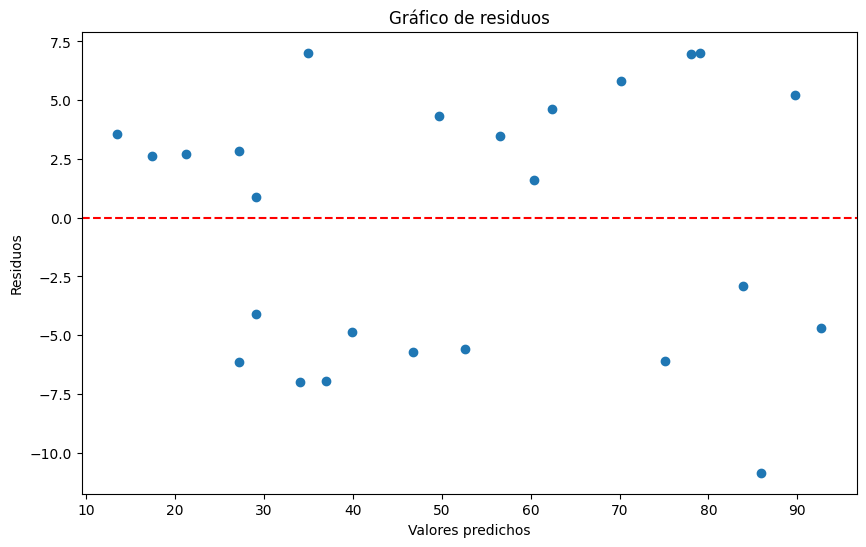

In [61]:
residuos = y - regressor.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(regressor.predict(X), residuos)
plt.title('Gráfico de residuos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## 📊 Análisis de residuos

### Datos reales vs predichos 🔵
Puntos de dispersión: Cada punto azul representa una comparación entre un valor real (eje x) y su correspondiente valor predicho por el modelo (eje y).

### Línea de referencia 🔴
Línea diagonal: La línea roja punteada representa una predicción perfecta, donde los valores predichos serían iguales a los reales.

### Conclusión 📈
Conclusión: La cercanía de los puntos a la línea diagonal indica la precisión del modelo. Los puntos que se desvían significativamente de esta línea representan predicciones menos precisas.


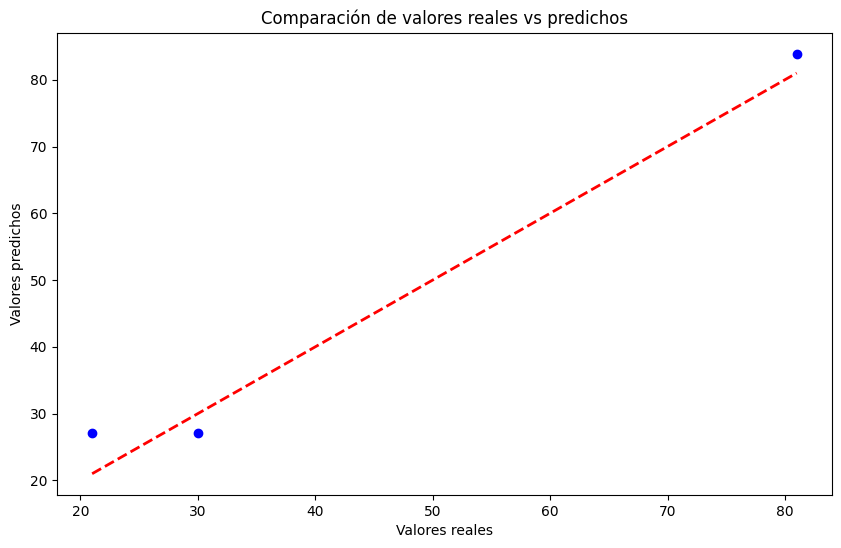

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Comparación de valores reales vs predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

### 📊 Histograma de errores

## Distribución de errores 🔵
Barras del histograma: Cada barra azul representa la frecuencia de errores en un rango específico.

## Conclusión 📈
Conclusión: La forma del histograma indica la distribución de los errores. Una distribución simétrica centrada en cero sugiere que el modelo no tiene un sesgo sistemático. Los sesgos hacia un lado o formas irregulares podrían indicar problemas en el modelo.

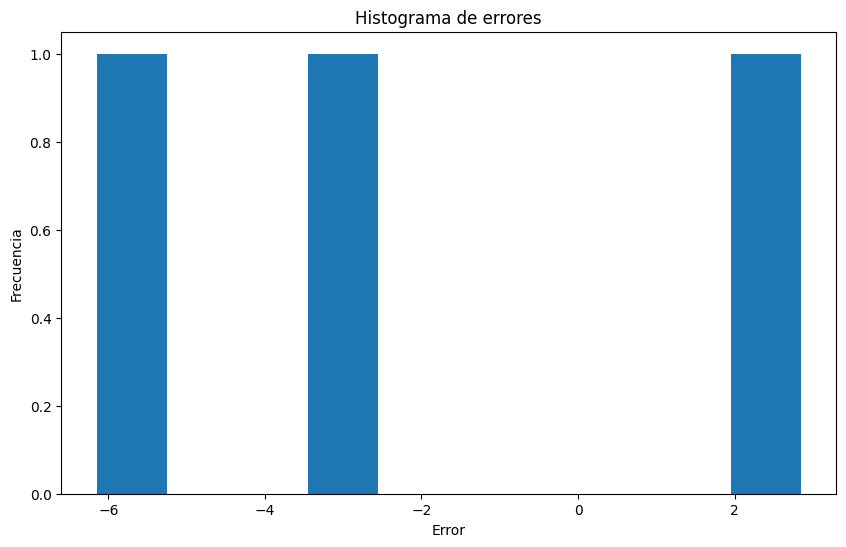

In [64]:
errores = y_test - y_pred
plt.figure(figsize=(10,6))
plt.hist(errores, bins=10)
plt.title('Histograma de errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()